In [ ]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict


In [3]:
class BMI_state(TypedDict):
    weight:float
    height:float
    bmi:float
    summary:str


In [4]:
def calculate_bmi(state:BMI_state)->BMI_state:
    weight=state['weight']
    height=state['height']
    state['bmi']=weight/(height**2)
    return state


In [5]:
def label_bmi(state:BMI_state)->BMI_state:
    if state['bmi']<18:
        state['summary']="Obase"
    elif state['bmi']>18:
        state['summary']="thin"
    else:
        state['summary']="Neutral"
    return state


In [6]:
#define the graph and its nodes
graph=StateGraph(BMI_state)
graph.add_node('Calculate_BMI',calculate_bmi)
graph.add_node('label_bmi',label_bmi)
#define the nodes
graph.add_edge(START,'Calculate_BMI')
graph.add_edge('Calculate_BMI','label_bmi')
graph.add_edge('label_bmi',END)

workflow=graph.compile()

initial_state={'weight':85,'height':1.70}
final_state=workflow.invoke(initial_state)
print(final_state)


{'weight': 85, 'height': 1.7, 'bmi': 29.411764705882355, 'summary': 'thin'}


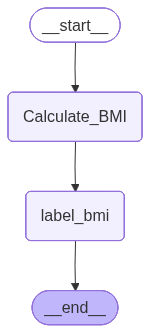

In [7]:
graph.compile()